In [1]:
import pandas as pd  
import matplotlib.pyplot as plt
from scipy import stats   
from lifelines import KaplanMeierFitter


In [2]:
# Install lifelines package
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "lifelines"])

0

In [3]:
df = pd.read_csv("C:\\Users\\04ama\\OneDrive\\pension survival analysis\\data\\synthetic_survival_data.csv")

In [4]:
df.head()

,id,age_at_entry,income_level,health_score,pension_contrib_rate,true_event_time,censor_time,time_to_event,event_observed
0,1,53,36794.48,78.4,0.052,8.653,7.657,7.657,0
1,2,39,45557.62,62.0,0.072,32.314,11.618,11.618,0
2,3,32,35686.13,52.1,0.048,19.388,25.000,19.388,1
3,4,45,70045.55,75.5,0.080,34.158,25.000,25.000,0
4,5,43,49361.51,86.3,0.054,15.370,25.000,15.370,1


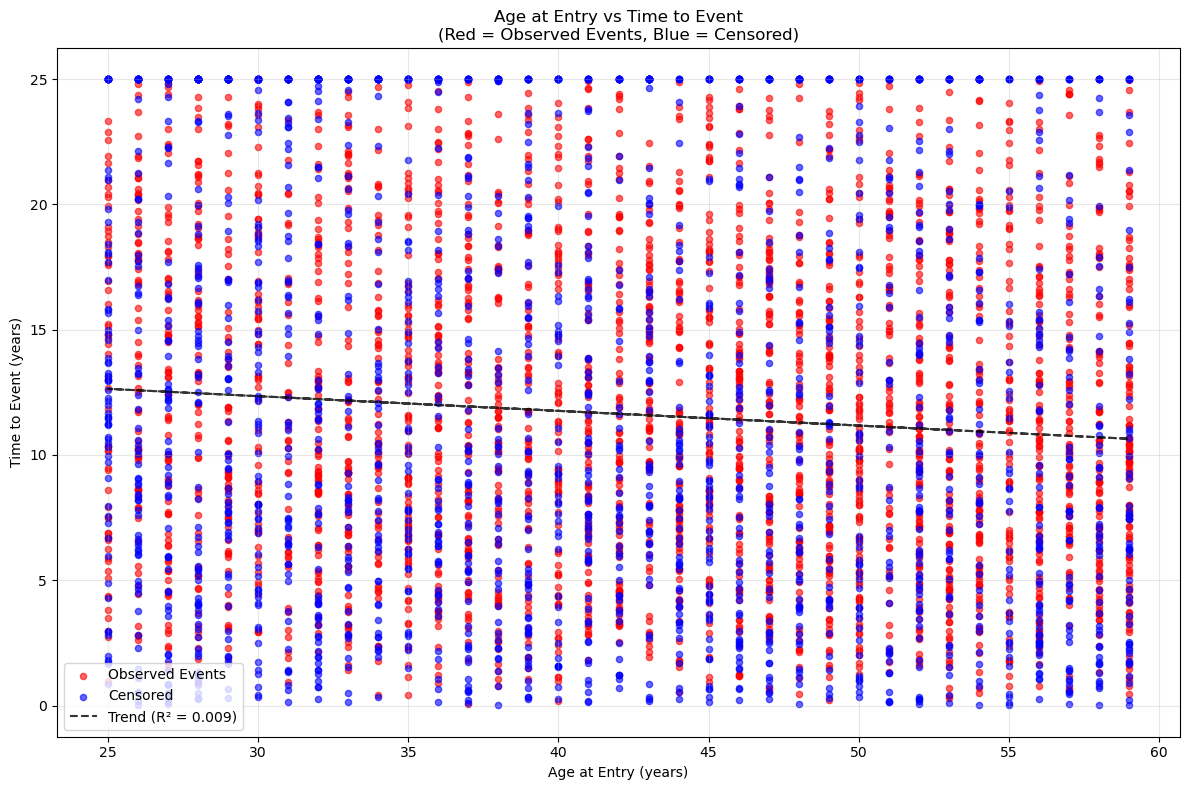

Correlation between age at entry and time to event (observed events only): -0.094
Number of observed events: 2854
Number of censored observations: 2146


In [5]:
# Graph of age at entry vs time to event 
plt.figure(figsize=(12,8))

# Create scatter plot with different colors for censored vs observed events
observed_events = df['event_observed'] == 1
censored_events = df['event_observed'] == 0

plt.scatter(df[observed_events]['age_at_entry'], 
           df[observed_events]['time_to_event'],
           alpha=0.6, s=20, color='red', label='Observed Events')

plt.scatter(df[censored_events]['age_at_entry'], 
           df[censored_events]['time_to_event'],
           alpha=0.6, s=20, color='blue', label='Censored')

plt.xlabel('Age at Entry (years)')
plt.ylabel('Time to Event (years)')
plt.title('Age at Entry vs Time to Event\n(Red = Observed Events, Blue = Censored)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add trend line for observed events only

observed_data = df[observed_events]
slope, intercept, r_value, p_value, std_err = stats.linregress(
    observed_data['age_at_entry'], observed_data['time_to_event'])
line = slope * df['age_at_entry'] + intercept
plt.plot(df['age_at_entry'], line, 'black', linestyle='--', alpha=0.8, 
         label=f'Trend (R² = {r_value**2:.3f})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Correlation between age at entry and time to event (observed events only): {r_value:.3f}")
print(f"Number of observed events: {observed_events.sum()}")
print(f"Number of censored observations: {censored_events.sum()}")

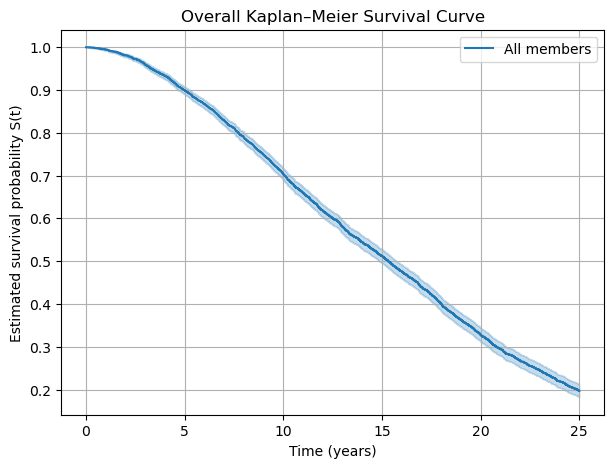

In [6]:
 #kaplan meier curves for the whole population 

km = KaplanMeierFitter()
km.fit(df["time_to_event"], df["event_observed"], label="All members")

plt.figure(figsize=(7,5))
km.plot_survival_function(ci_show=True)
plt.title("Overall Kaplan–Meier Survival Curve")
plt.xlabel("Time (years)")
plt.ylabel("Estimated survival probability S(t)")
plt.grid(True)
plt.show()


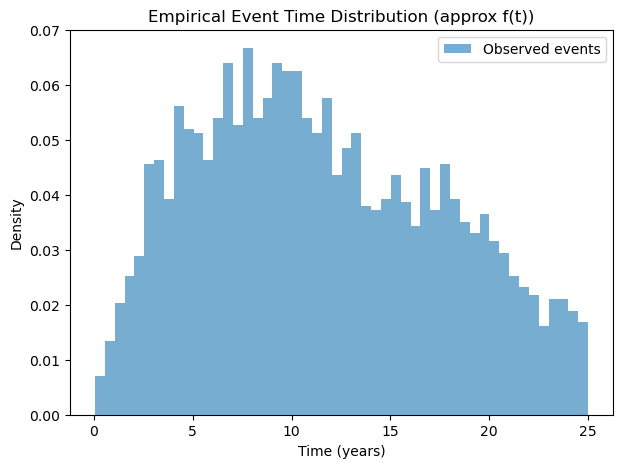

In [7]:
#histogram of survival times for observed events
plt.figure(figsize=(7,5))
plt.hist(df[df.event_observed==1]["time_to_event"], bins=50, density=True, alpha=0.6, label="Observed events")
plt.title("Empirical Event Time Distribution (approx f(t))")
plt.xlabel("Time (years)")
plt.ylabel("Density")
plt.legend()
plt.show()


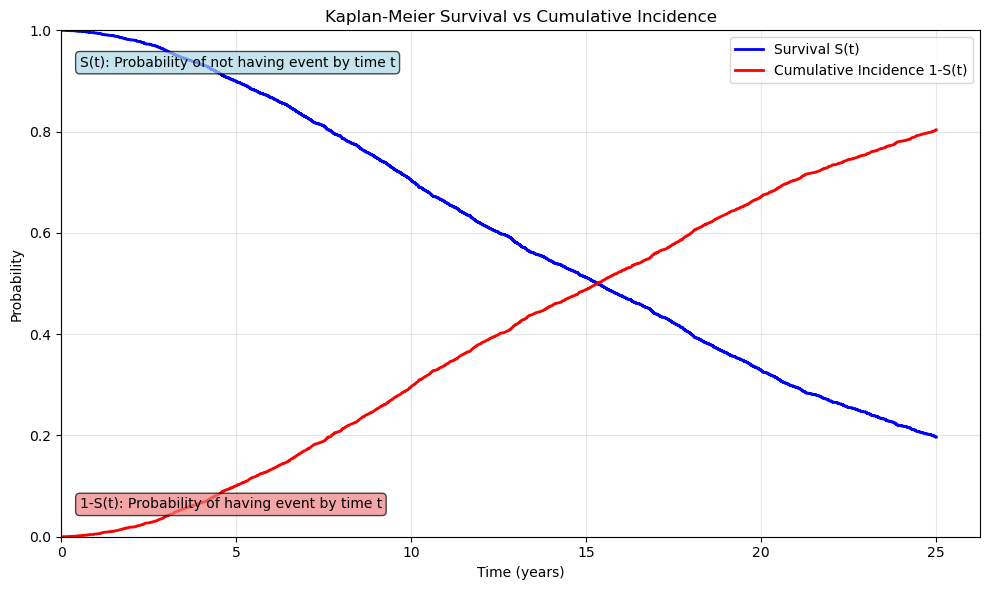

Median survival time: 15.31 years
Probability of surviving 10 years: 0.704
Probability of event by 10 years: 0.296


In [8]:
# Overlay KM survival curve and cumulative incidence (1-KM) curve
km = KaplanMeierFitter()
km.fit(df["time_to_event"], df["event_observed"], label="Survival S(t)")

plt.figure(figsize=(10, 6))

# Plot survival function S(t)
km.plot_survival_function(ci_show=False, color='blue', linewidth=2)

# Plot cumulative incidence 1-S(t)
cumulative_incidence = 1 - km.survival_function_
plt.plot(cumulative_incidence.index, cumulative_incidence.values, 
         color='red', linewidth=2, label='Cumulative Incidence 1-S(t)')

plt.title("Kaplan-Meier Survival vs Cumulative Incidence")
plt.xlabel("Time (years)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, None)
plt.ylim(0, 1)

# Add text annotations
plt.text(0.02, 0.95, 'S(t): Probability of not having event by time t', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
plt.text(0.02, 0.05, '1-S(t): Probability of having event by time t', 
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))

plt.tight_layout()
plt.show()

# Print some key statistics
median_survival = km.median_survival_time_
print(f"Median survival time: {median_survival:.2f} years")
print(f"Probability of surviving 10 years: {km.predict(10):.3f}")
print(f"Probability of event by 10 years: {1 - km.predict(10):.3f}")

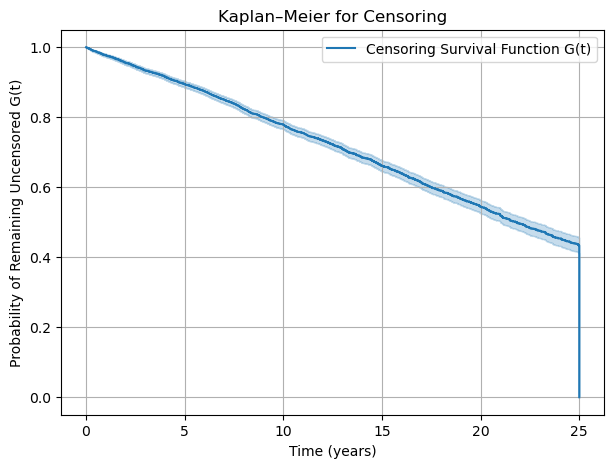

,Censoring Survival Function G(t)
timeline,
0.000,1.0000
0.004,0.9998
0.006,0.9996
0.012,0.9994
0.023,0.9992


In [9]:


# Flip indicator: 1 = censored (event for censoring KM)
df["censor_event"] = 1 - df["event_observed"]

# Fit KM for censoring
km_censor = KaplanMeierFitter()
km_censor.fit(
    durations=df["time_to_event"],
    event_observed=df["censor_event"],
    label="Censoring Survival Function G(t)"
)

# Plot
plt.figure(figsize=(7,5))
km_censor.plot_survival_function(ci_show=True)
plt.title("Kaplan–Meier for Censoring")
plt.xlabel("Time (years)")
plt.ylabel("Probability of Remaining Uncensored G(t)")
plt.grid(True)
plt.show()

# (Optional) inspect values
km_censor.survival_function_.head()


C:\Users\04ama\AppData\Local\Temp\ipykernel_36088\303687509.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for q, group_df in df_temp.groupby(f'{col}_quartile'):


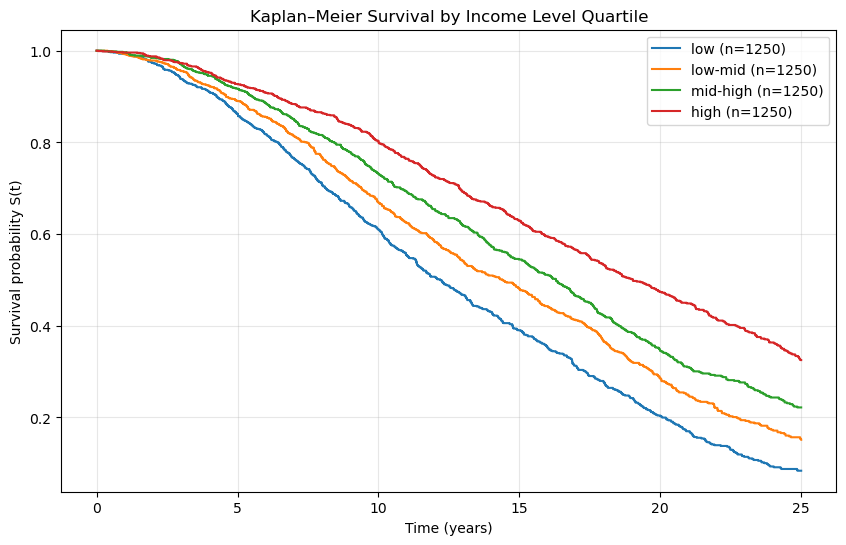

C:\Users\04ama\AppData\Local\Temp\ipykernel_36088\303687509.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for q, group_df in df_temp.groupby(f'{col}_quartile'):


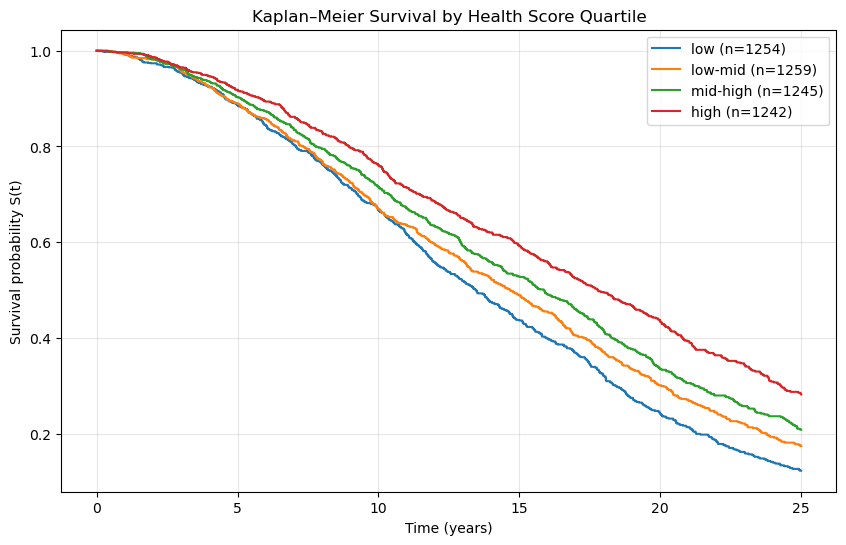

C:\Users\04ama\AppData\Local\Temp\ipykernel_36088\303687509.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for q, group_df in df_temp.groupby(f'{col}_quartile'):


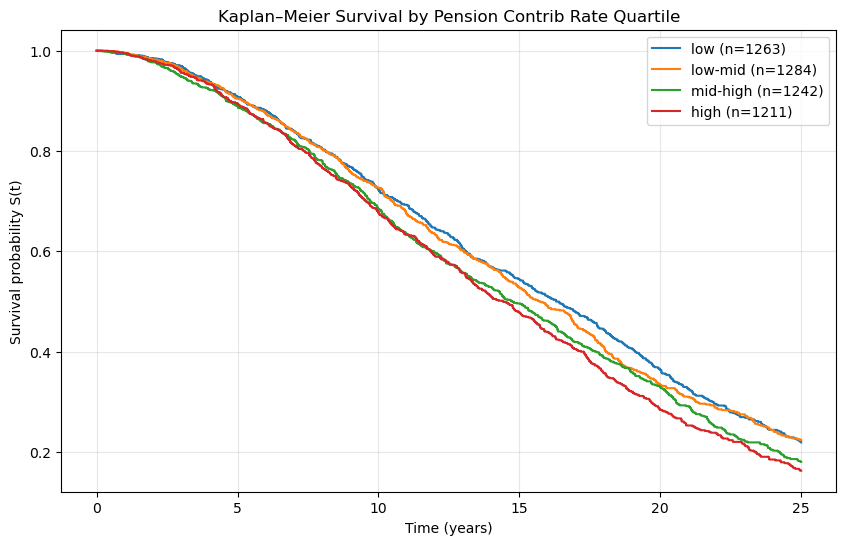

In [10]:
# Create survival curves by quartiles for each variable
columns = ['income_level', 'health_score', 'pension_contrib_rate']

for col in columns:
    # Create a fresh copy for each column to avoid permanent changes
    df_temp = df.copy()
    
    # Create quartiles for this column only
    df_temp[f'{col}_quartile'] = pd.qcut(df_temp[col], 4, labels=["low", "low-mid", "mid-high", "high"])
    
    plt.figure(figsize=(10,6))
    
    # Plot all quartiles on the same graph
    for q, group_df in df_temp.groupby(f'{col}_quartile'):
        km_q = KaplanMeierFitter()
        km_q.fit(group_df["time_to_event"], group_df["event_observed"], label=f"{q} (n={len(group_df)})")
        km_q.plot_survival_function(ci_show=False)
    
    plt.title(f"Kaplan–Meier Survival by {col.replace('_', ' ').title()} Quartile")
    plt.xlabel("Time (years)")
    plt.ylabel("Survival probability S(t)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


In [11]:
df.head()

,id,age_at_entry,income_level,health_score,pension_contrib_rate,true_event_time,censor_time,time_to_event,event_observed,censor_event
0,1,53,36794.48,78.4,0.052,8.653,7.657,7.657,0,1
1,2,39,45557.62,62.0,0.072,32.314,11.618,11.618,0,1
2,3,32,35686.13,52.1,0.048,19.388,25.000,19.388,1,0
3,4,45,70045.55,75.5,0.080,34.158,25.000,25.000,0,1
4,5,43,49361.51,86.3,0.054,15.370,25.000,15.370,1,0


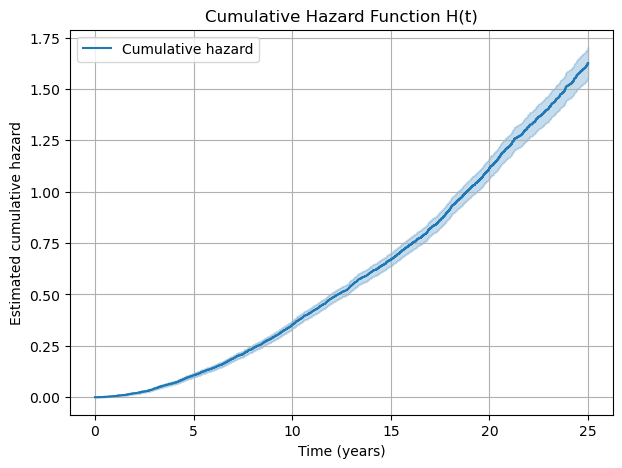

In [12]:
#estimating the hazard function using nelson aalen method
from lifelines import NelsonAalenFitter

naf = NelsonAalenFitter()
naf.fit(df["time_to_event"], df["event_observed"], label="Cumulative hazard")

plt.figure(figsize=(7,5))
naf.plot(ci_show=True)
plt.title("Cumulative Hazard Function H(t)")
plt.xlabel("Time (years)")
plt.ylabel("Estimated cumulative hazard")
plt.grid(True)
plt.show()
